In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Carrega os dados do Bitcoin
df = pd.read_csv('data/bitcoin_data.csv')

In [15]:
df.head()

,timestamp,price,date
0,1696032000000,26917.199102,2023-09-30 00:00:00
1,1696118400000,26969.876144,2023-10-01 00:00:00
2,1696204800000,27967.510579,2023-10-02 00:00:00
3,1696291200000,27615.064885,2023-10-03 00:00:00
4,1696377600000,27439.121947,2023-10-04 00:00:00


In [16]:
# Descobrir os tipos das colunas
df.dtypes

timestamp      int64
price        float64
date          object
dtype: object

In [17]:
# Converte a coluna 'date' para datetime
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')

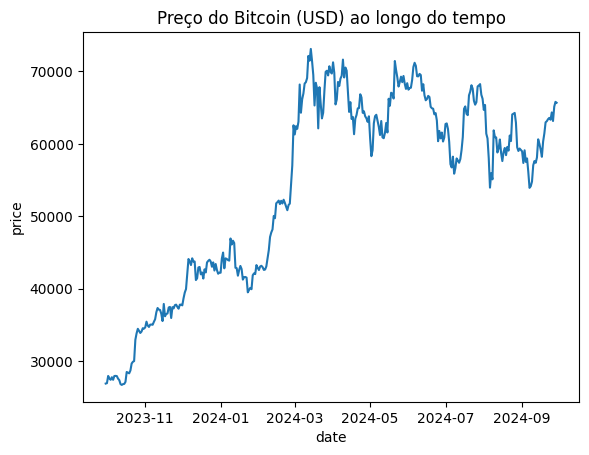

In [19]:
# Plota o preço do Bitcoin ao longo do tempo
sns.lineplot(data=df, x='date', y='price')
plt.title('Preço do Bitcoin (USD) ao longo do tempo')
plt.show()

In [22]:
#Calcula a média móvel do preço. window é o tamanho da janela, nesse caso de 30 dias
df['moving_avg'] = df['price'].rolling(window=30).mean()

In [23]:
#A variação diária do preço em porcentagem
df['daily_variation'] = df['price'].pct_change()

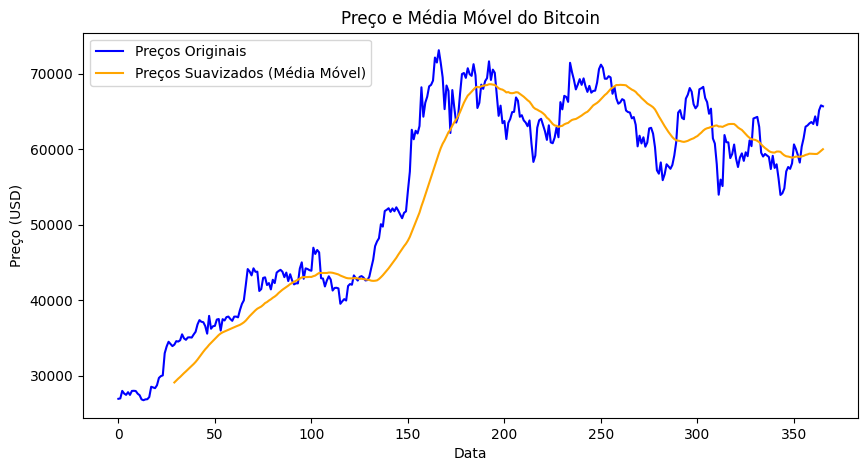

In [28]:
#Visualização da série temporal com a suavização

plt.figure(figsize=(10, 5))

# Série temporal original
sns.lineplot(x=df.index, y=df['price'], label='Preços Originais', color='blue')

# Série temporal suavizada
sns.lineplot(x=df.index, y=df['moving_avg'], label='Preços Suavizados (Média Móvel)', color='orange')

plt.title('Preço e Média Móvel do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

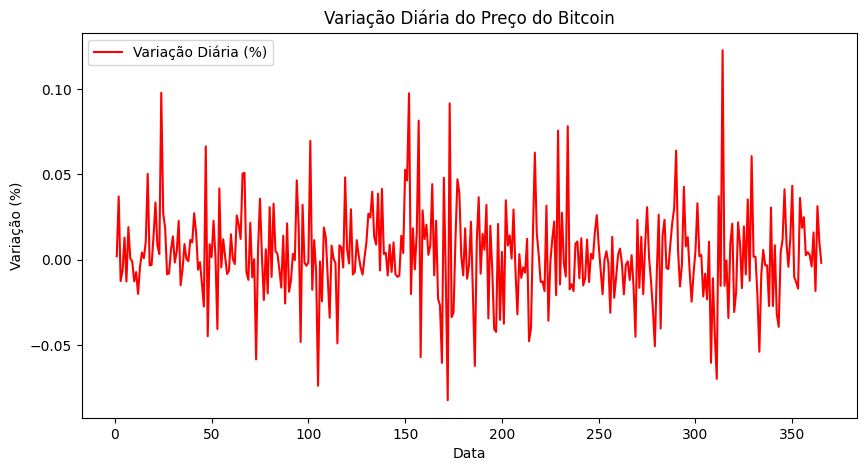

In [32]:
#Visualização da variação diária do preço
plt.figure(figsize=(10, 5))

sns.lineplot(x=df.index, y=df['daily_variation'], label='Variação Diária (%)', color='red')

plt.title('Variação Diária do Preço do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Variação (%)')
plt.legend()
plt.show()

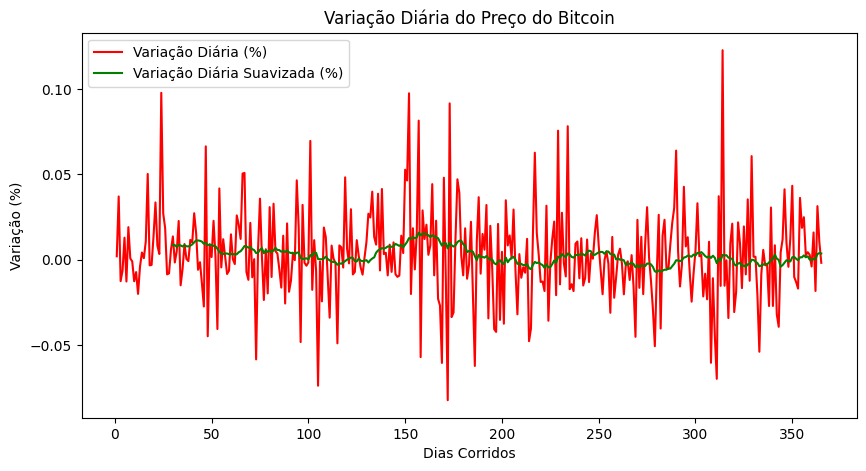

In [34]:
#Como percebido, ficou muito difícil de visualizar a variação diária do preço. Vamos tentar outra abordagem.

#Suavizando a variação diária
df['daily_variation_smooth'] = df['daily_variation'].rolling(window=30).mean()

plt.figure(figsize=(10, 5))

# Variação diária original
sns.lineplot(x=df.index, y=df['daily_variation'], label='Variação Diária (%)', color='red')

# Variação diária suavizada
sns.lineplot(x=df.index, y=df['daily_variation_smooth'], label='Variação Diária Suavizada (%)', color='green')

plt.title('Variação Diária do Preço do Bitcoin')
plt.xlabel('Dias Corridos')
plt.ylabel('Variação (%)')
plt.legend()
plt.show()

### Definindo o Auto-Regressive Order e o Moving Average Order

Para o modelo ARIMA, os parâmetros p, d e q têm significados específicos que ajudam a definir a estrutura do modelo:

- p (Auto-Regressive Order):

Este parâmetro representa a ordem da parte autorregressiva do modelo.
Em termos simples, p indica quantos valores passados da série temporal são utilizados para prever o valor atual. Por exemplo, se p = 2, isso significa que os dois valores anteriores da série temporal serão utilizados na previsão.

- d (Differencing Order):

Este parâmetro representa o número de vezes que os dados devem ser diferenciados para tornar a série temporal estacionária.
Uma série temporal é dita estacionária quando suas propriedades estatísticas, como média e variância, não mudam ao longo do tempo. O parâmetro d indica quantas vezes você precisa subtrair o valor anterior da série para atingir essa estacionaridade. Por exemplo, se d = 1, você subtrai o valor atual do valor anterior.

- q (Moving Average Order):

Este parâmetro representa a ordem da parte de média móvel do modelo.
O q indica quantos erros passados (resíduos) do modelo são utilizados na previsão do valor atual. Por exemplo, se q = 1, isso significa que o erro do período anterior será considerado na previsão.

### Como escolher os valores de p, d e q:

- d: Geralmente, você pode começar com d = 1, pois isso é suficiente na maioria das vezes para tornar a série estacionária. 

- p e q: Irei usar os métodos ACF (Autocorrelation Function) e PACF (Partial Autocorrelation Function) para determinar os valores de p e q. O gráfico ACF pode ajudar a identificar q, enquanto o gráfico PACF pode ajudar a identificar p.

<Figure size 1200x600 with 0 Axes>

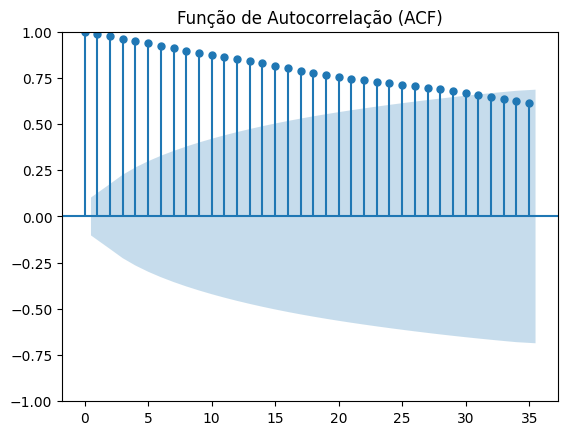

<Figure size 1200x600 with 0 Axes>

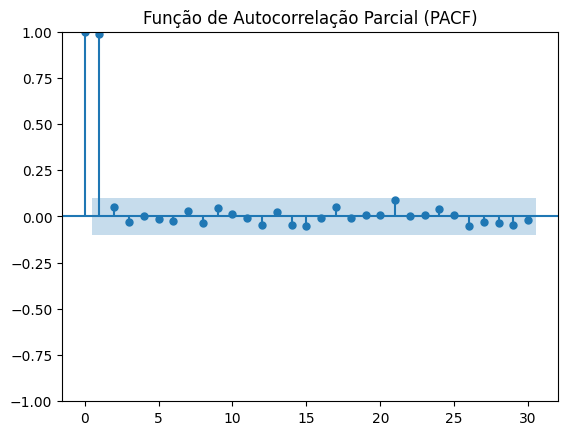

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

price_data = df['price']

# Plotando ACF
plt.figure(figsize=(12, 6))
plot_acf(price_data, lags=35)  # Mude o número de lags conforme necessário
plt.title('Função de Autocorrelação (ACF)')
plt.show()

# Plotando PACF
plt.figure(figsize=(12, 6))
plot_pacf(price_data, lags=30)  # Mude o número de lags conforme necessário
plt.title('Função de Autocorrelação Parcial (PACF)')
plt.show()


In [35]:
df.head(50)

,timestamp,price,date,moving_avg,daily_variation,daily_variation_smooth
0,1696032000000,26917.199102,2023-09-30,NaN,NaN,NaN
1,1696118400000,26969.876144,2023-10-01,NaN,0.001957,NaN
2,1696204800000,27967.510579,2023-10-02,NaN,0.036991,NaN
3,1696291200000,27615.064885,2023-10-03,NaN,-0.012602,NaN
4,1696377600000,27439.121947,2023-10-04,NaN,-0.006371,NaN
5,1696464000000,27792.111277,2023-10-05,NaN,0.012864,NaN
6,1696550400000,27435.874615,2023-10-06,NaN,-0.012818,NaN
7,1696636800000,27958.196437,2023-10-07,NaN,0.019038,NaN
8,1696723200000,27977.543491,2023-10-08,NaN,0.000692,NaN
9,1696809600000,27948.103652,2023-10-09,NaN,-0.001052,NaN


In [36]:
# Exportndo o dataframe para um arquivo CSV

df.to_csv('data/bitcoin_data_processed.csv', index=False)

## Conclusões

Como pode-se ver no `df.head()` acima, os primeiros valores da coluna **'moving_avg'** e da **'daily_variation'** aparecem como `NaN`. Isso acontece devido à natureza dos cálculos envolvidos. A **média móvel** depende de uma janela de períodos anteriores para ser calculada. Por exemplo, se estivermos usando uma janela de 10 dias, os primeiros 9 registros não têm valores suficientes para realizar o cálculo, resultando em valores `NaN`. Somente após acumular os 10 períodos iniciais, a média móvel pode ser computada.

De forma similar, a **variação diária** compara o valor do ativo com o dia anterior. No primeiro registro, não existe um valor anterior para realizar essa comparação, fazendo com que o resultado da variação seja `NaN`. A partir do segundo registro, já é possível calcular a variação diária, pois existe um valor do dia anterior disponível para a comparação.

Em resumo, esses valores `NaN` nos primeiros registros são esperados e fazem parte das limitações inerentes a cálculos que dependem de dados históricos.

## Então, porque usar médias móveis?

Elas permitem uma suavização da série temporal original, dessa forma reduzindo ruídos e garantindo maior estabilidade nas previsões, o que a longo prazo pode auxiliar a encontrar tendências. 
Outro ponto interessante é a remoção dos outliers, que a depender do modelo impactam muito o resultado.